# Credit Risk Prediction Framework (Banking Portfolio Project)

This notebook builds a machine learning model to predict loan defaults using real-world applicant data. 
It simulates business decisions such as loan approval, risk scoring, and economic impact. 
Final deliverables include default predictions, SHAP-based model interpretation, and credit scoring insights using the 5Cs framework.

## 1. Data Loading and Setup


In [5]:
import pandas as pd

df = pd.read_csv("~/Downloads/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## 2. Exploratory data analysis (EDA )

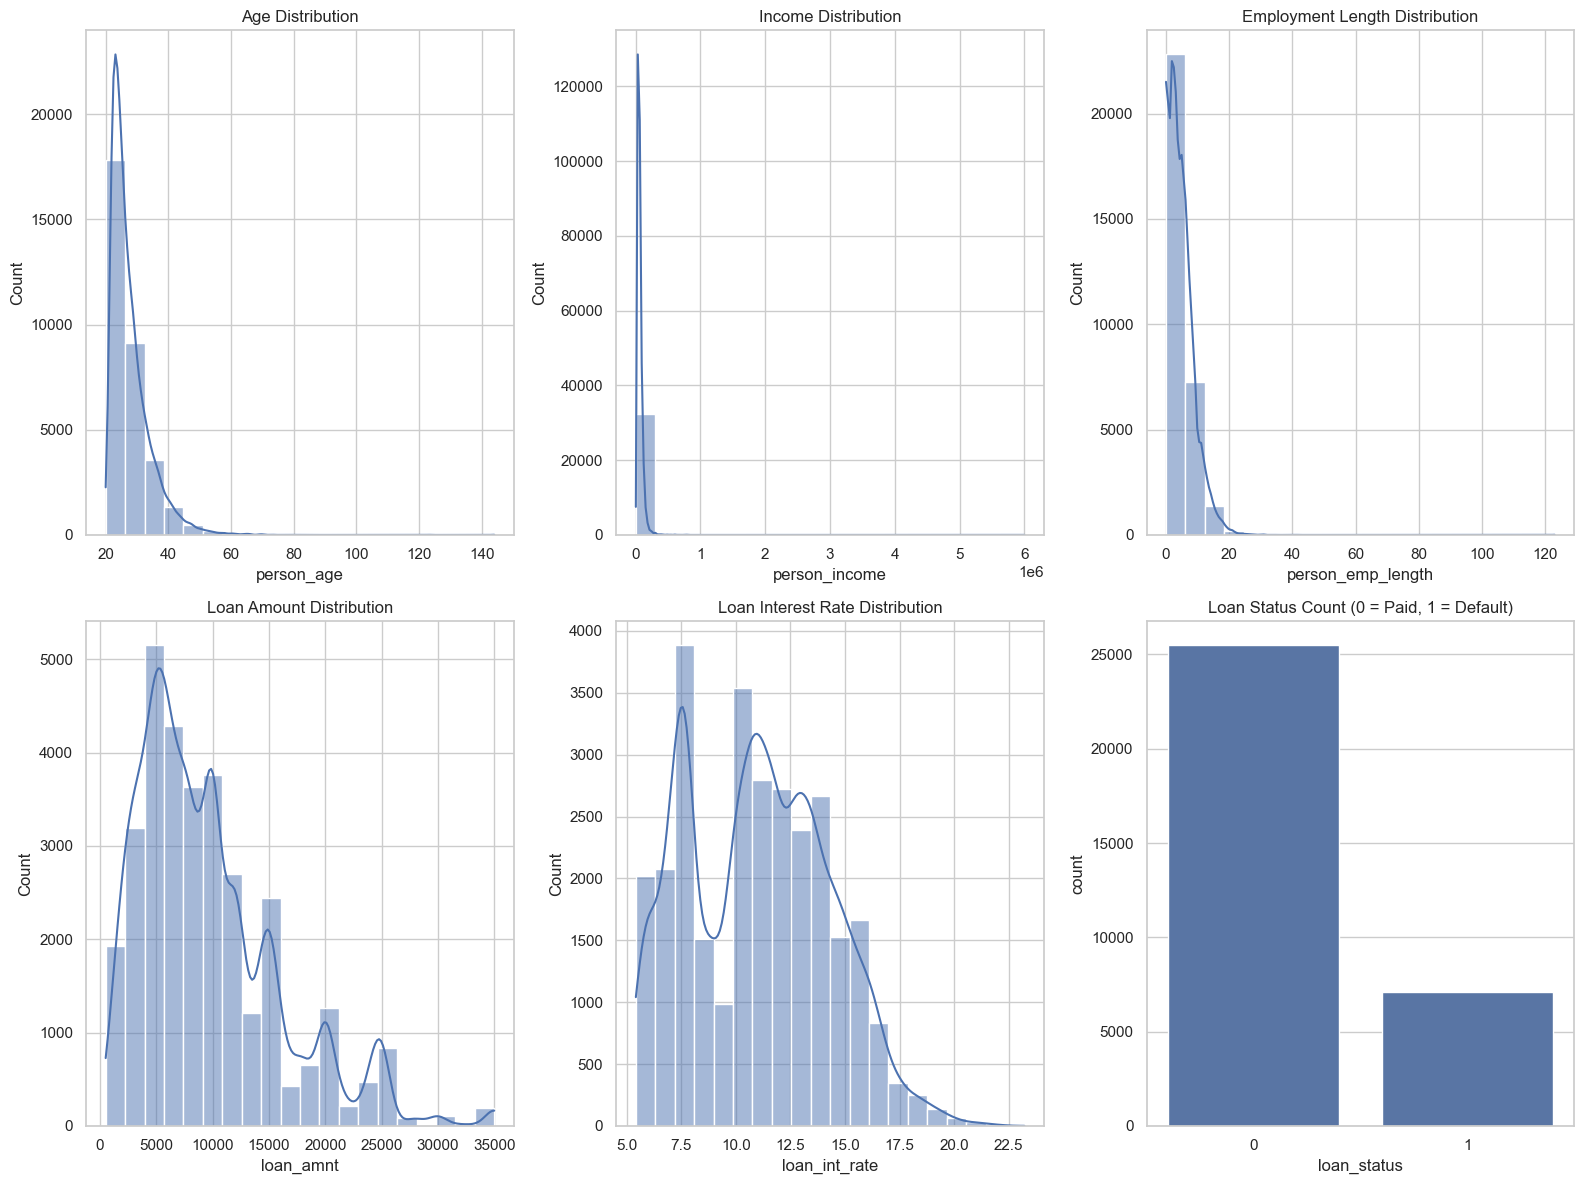

In [6]:
# Visualize distributions of key applicant and loan features for initial EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid')
plt.figure(figsize=(16, 12))

# 1. Age Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['person_age'], bins=20, kde=True)
plt.title('Age Distribution')

# 2. Income Distribution
plt.subplot(2, 3, 2)
sns.histplot(df['person_income'], bins=20, kde=True)
plt.title('Income Distribution')

# 3. Employment Length Distribution
plt.subplot(2, 3, 3)
sns.histplot(df['person_emp_length'], bins=20, kde=True)
plt.title('Employment Length Distribution')

# 4. Loan Amount Distribution
plt.subplot(2, 3, 4)
sns.histplot(df['loan_amnt'], bins=20, kde=True)
plt.title('Loan Amount Distribution')

# 5. Interest Rate Distribution
plt.subplot(2, 3, 5)
sns.histplot(df['loan_int_rate'], bins=20, kde=True)
plt.title('Loan Interest Rate Distribution')

# 6. Loan Status Counts
plt.subplot(2, 3, 6)
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Count (0 = Paid, 1 = Default)')

plt.tight_layout()
plt.show()

# Possibility of outliers on age, Income and Length

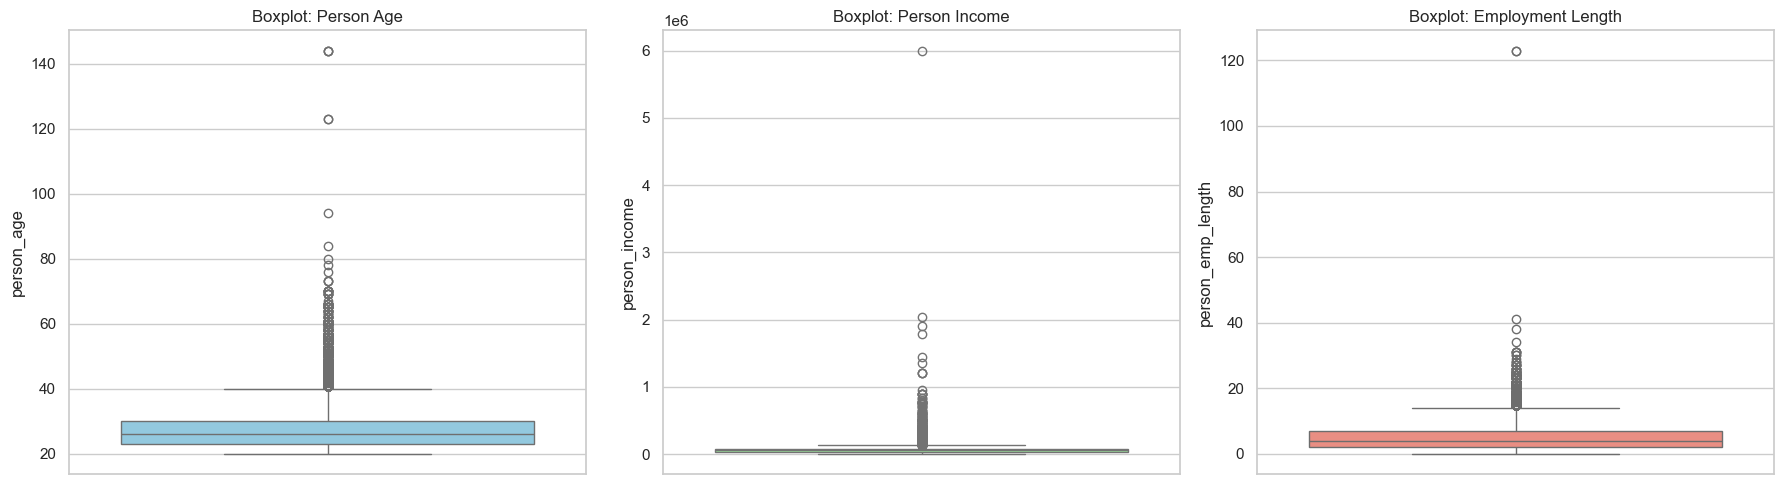

In [7]:
# Detect outliers using boxplots for key numerical features
import matplotlib.pyplot as plt
import seaborn as sns


# Set the visual style
sns.set(style="whitegrid")

# Create figure with 3 subplots
plt.figure(figsize=(18, 5))

# 1. Age
plt.subplot(1, 3, 1)
sns.boxplot(y=df['person_age'], color='skyblue')
plt.title('Boxplot: Person Age')

# 2. Income
plt.subplot(1, 3, 2)
sns.boxplot(y=df['person_income'], color='lightgreen')
plt.title('Boxplot: Person Income')

# 3. Employment Length
plt.subplot(1, 3, 3)
sns.boxplot(y=df['person_emp_length'], color='salmon')
plt.title('Boxplot: Employment Length')

plt.tight_layout()
plt.show()

### Outlier Handling

We remove extreme values in age, income, and employment length that fall far beyond reasonable human or business limits.

- Age > 120: Biologically implausible
- Income > $5M: Extremely rare in consumer loan context and skews distribution
- Employment Length > 100 years: Data entry or parsing error

These decisions are informed by the boxplots above, where such points are visibly detached from the main distribution. Removing them improves model robustness without affecting generalizability.

In [8]:
# Manually inspect extreme values in age, income, and employment length

print('person_age outlier : ')
print(df[df['person_age'] > 120]['person_age'])
print('\n person_income: ')
print(df[df['person_income']> 5000000]['person_income'])
print('\n person_emp_length')
print(df[df['person_emp_length']> 100]['person_emp_length'])

person_age outlier : 
81       144
183      144
575      123
747      123
32297    144
Name: person_age, dtype: int64

 person_income: 
32297    6000000
Name: person_income, dtype: int64

 person_emp_length
0      123.0
210    123.0
Name: person_emp_length, dtype: float64


In [9]:
# Drop extreme outliers based on business rules:

df = df[(df['person_age'] <= 120) &
                (df['person_income'] <= 5000000) &
                (df['person_emp_length'] <= 100)]

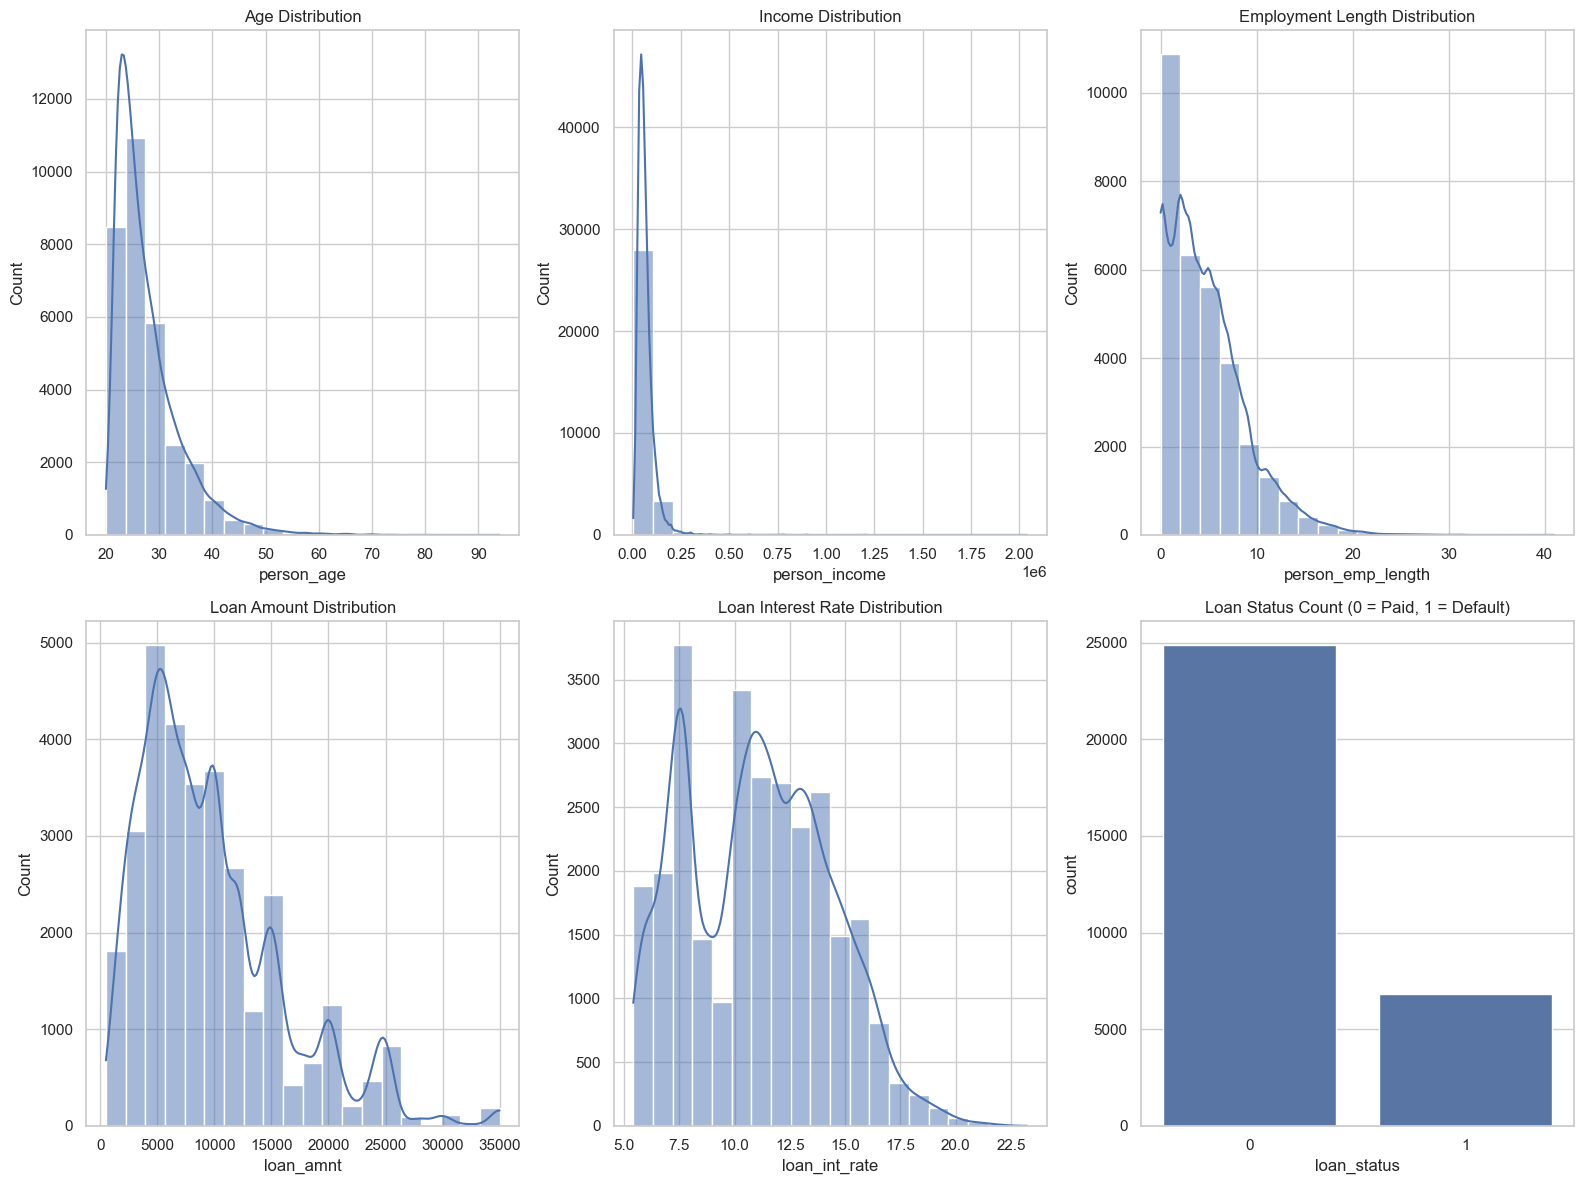

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set visual style
sns.set(style='whitegrid')
plt.figure(figsize=(16, 12))

# 1. Age Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['person_age'], bins=20, kde=True)
plt.title('Age Distribution')

# 2. Income Distribution
plt.subplot(2, 3, 2)
sns.histplot(df['person_income'], bins=20, kde=True)
plt.title('Income Distribution')

# 3. Employment Length Distribution
plt.subplot(2, 3, 3)
sns.histplot(df['person_emp_length'], bins=20, kde=True)
plt.title('Employment Length Distribution')

# 4. Loan Amount Distribution
plt.subplot(2, 3, 4)
sns.histplot(df['loan_amnt'], bins=20, kde=True)
plt.title('Loan Amount Distribution')

# 5. Interest Rate Distribution
plt.subplot(2, 3, 5)
sns.histplot(df['loan_int_rate'], bins=20, kde=True)
plt.title('Loan Interest Rate Distribution')

# 6. Loan Status Counts
plt.subplot(2, 3, 6)
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Count (0 = Paid, 1 = Default)')

plt.tight_layout()
plt.show()

# Possibility of outliers on age, Income and Length

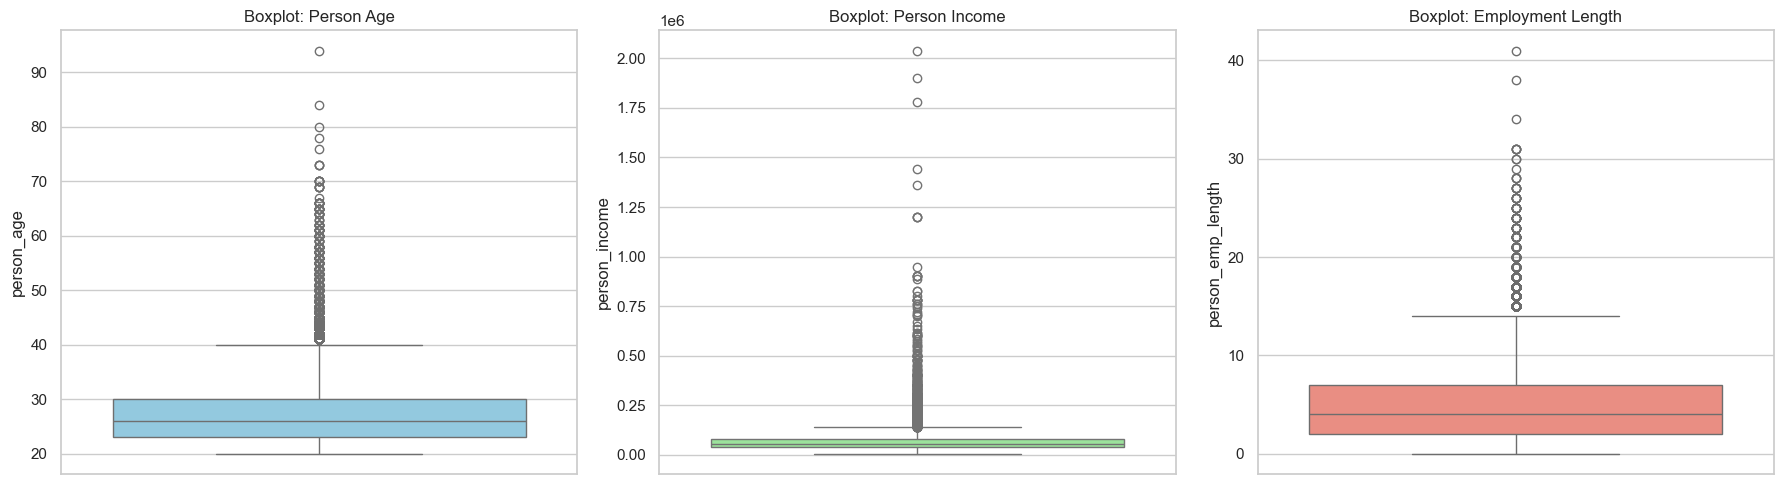

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Create figure with 3 subplots
plt.figure(figsize=(18, 5))

# 1. Age
plt.subplot(1, 3, 1)
sns.boxplot(y=df['person_age'], color='skyblue')
plt.title('Boxplot: Person Age')

# 2. Income
plt.subplot(1, 3, 2)
sns.boxplot(y=df['person_income'], color='lightgreen')
plt.title('Boxplot: Person Income')

# 3. Employment Length
plt.subplot(1, 3, 3)
sns.boxplot(y=df['person_emp_length'], color='salmon')
plt.title('Boxplot: Employment Length')

plt.tight_layout()
plt.show()

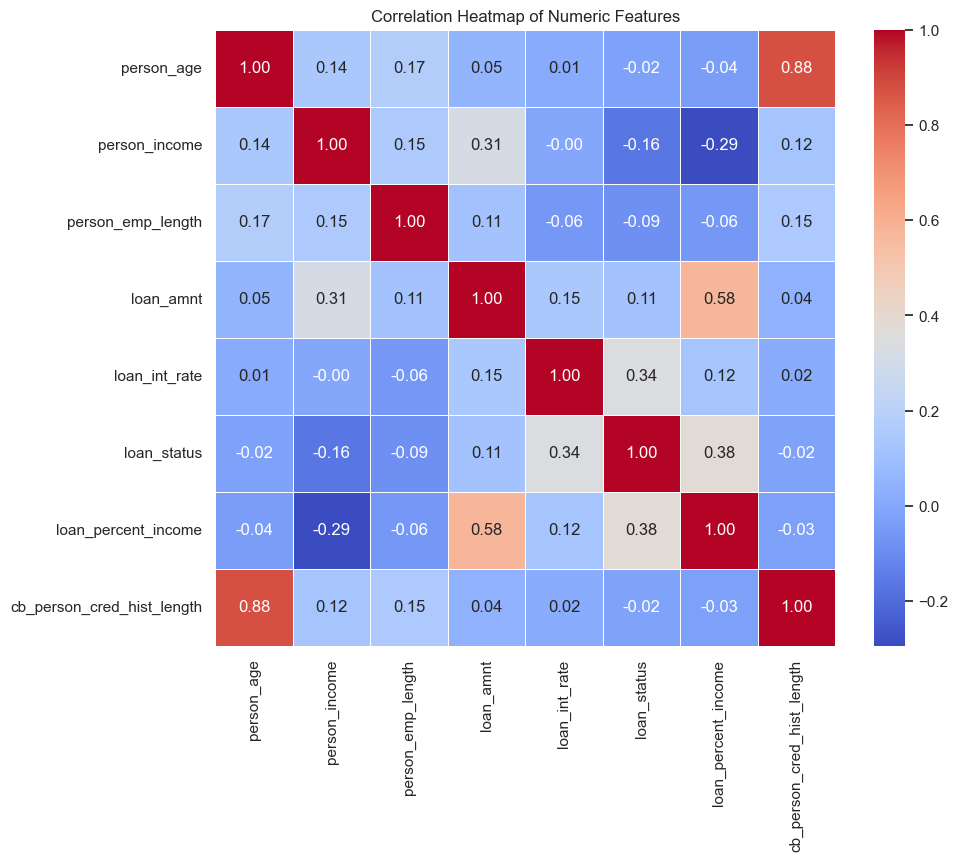

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only numeric columns
df_numeric = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## 3. Data Preprocessing

In [13]:
# Data cleaning
print(df.isna().sum())
#person_emp_length
#loan_int_rate
df['person_emp_length'] =  df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

print(df.isna().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3047
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


## 4. Feature Engineering

In [14]:
# Recreate the bin column before the train/test split
df['loan_income_ratio_bin'] = pd.cut(
    df['loan_percent_income'],
    bins=[0, 0.2, 0.4, 0.6, 1],
    labels=["low", "med", "high", "very_high"]
)

# Then label encode it (it's categorical)
df['loan_income_ratio_bin'] = df['loan_income_ratio_bin'].astype(str)
# Convert homeownership string to binary (1 = homeowner)
df['is_homeowner'] = df['person_home_ownership'].isin(['MORTGAGE', 'OWN'])

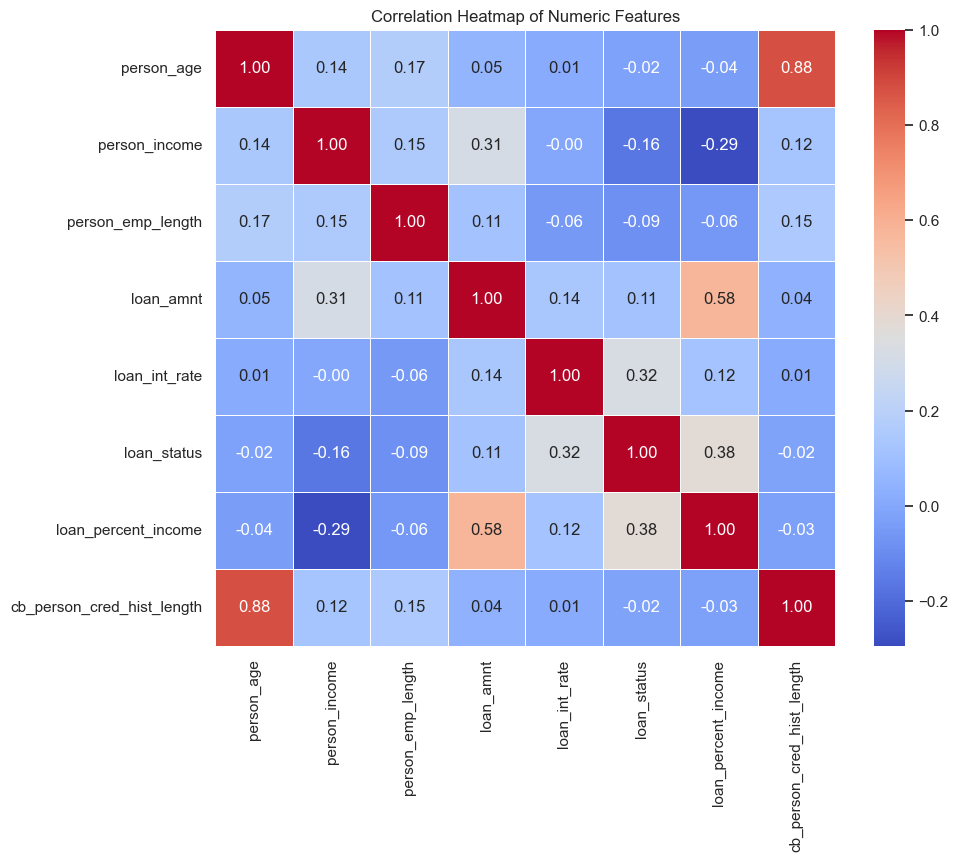

In [15]:
# Filter only numeric columns
df_numeric = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [16]:
df['loan_status'].value_counts(normalize = True)

loan_status
0    0.784558
1    0.215442
Name: proportion, dtype: float64

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_cleaned = df.copy()

# Label encode all object and categorical columns
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object' or str(df_cleaned[col].dtype).startswith('category'):
        df_cleaned[col] = df_cleaned[col].astype(str)  # Make sure it's string
        df_cleaned[col] = LabelEncoder().fit_transform(df_cleaned[col])
        

df_cleaned['is_homeowner'] = df_cleaned['is_homeowner'].astype(int)
print(df_cleaned.dtypes)
print(df_cleaned.select_dtypes(exclude=['int64', 'float64']).columns)

person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
loan_income_ratio_bin           int64
is_homeowner                    int64
dtype: object
Index([], dtype='object')


## 5. Model Development

In [18]:
# Comparing Logistic Regression, Random Forest, and XGBoost 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# STEP 1: Fix the column dropping issue
df = df.drop('loan_income_ratio_bin', axis=1, errors='ignore')  # errors='ignore' prevents KeyError

# STEP 2: Proper categorical encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# STEP 3: Prepare features and target
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# STEP 5: Calculate proper scale_pos_weight
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# STEP 6: Model comparison with proper parameters
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
}

# STEP 7: Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    results[name] = roc_auc_score(y_test, y_pred_proba)

# STEP 8: Display results
print("Model Comparison - AUC Scores:")
for model, score in results.items():
    print(f"{model}: {score:.3f}")


Model Comparison - AUC Scores:
Logistic Regression: 0.779
Random Forest: 0.935
XGBoost: 0.947


In [19]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

# 1. Encode categorical columns consistently
df_encoded = pd.get_dummies(df, drop_first=True)  # handles all at once

# 2. Define X and y
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4. Apply SMOTE on encoded training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- Step 3: Define parameter grid for tuning ---
param_grid = {
    'n_estimators': [100, 200],                  # Keep modest to avoid overboosting
    'max_depth': [3, 4, 5],                      # Shallower trees = less overfit
    'learning_rate': [0.01, 0.05],               # Smaller learning steps
    'subsample': [0.6, 0.7, 0.8],                # Prevent overfitting by bagging
    'colsample_bytree': [0.6, 0.7, 0.8],         # Use fewer features per tree
    'min_child_weight': [5, 10],                 # Require more samples per leaf
    'gamma': [1, 3, 5]                           # Require more gain to split
}

# --- Step 4: Build base model with correct class weighting ---
base_model = XGBClassifier(
    enable_categorical=True,
    scale_pos_weight=(y_train_resampled.value_counts()[0] / y_train_resampled.value_counts()[1]),
    eval_metric='logloss'
)

# --- Step 5: Run RandomizedSearchCV ---
rs = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    random_state=42,
    verbose=1,
    n_jobs=-1
)
rs.fit(X_train_resampled, y_train_resampled)
best_model = rs.best_estimator_



Fitting 3 folds for each of 20 candidates, totalling 60 fits


## 6. Model Evaluation

In [20]:
# 4. Predict + evaluate
y_pred = best_model.predict(X_test)  
y_prob = best_model.predict_proba(X_test)[:, 1]  

print("AUC:", roc_auc_score(y_test, y_prob))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

AUC: 0.9369609670152821
Precision: 0.9050179211469535
Recall: 0.73992673992674


In [21]:
# --- Model Overfitting Check ---
# We evaluate the model's AUC on both the training and test sets.
# A large gap between train AUC and test AUC may indicate overfitting.
# Ideally, both scores should be close, indicating good generalization.

from sklearn.metrics import roc_auc_score

# Predictions
y_train_pred = best_model.predict(X_train)
y_train_prob = best_model.predict_proba(X_train)[:, 1]

# Evaluate
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_prob)  # already calculated

print("Train AUC:", train_auc)
print("Test AUC :", test_auc)

Train AUC: 0.940338042567334
Test AUC : 0.9369609670152821


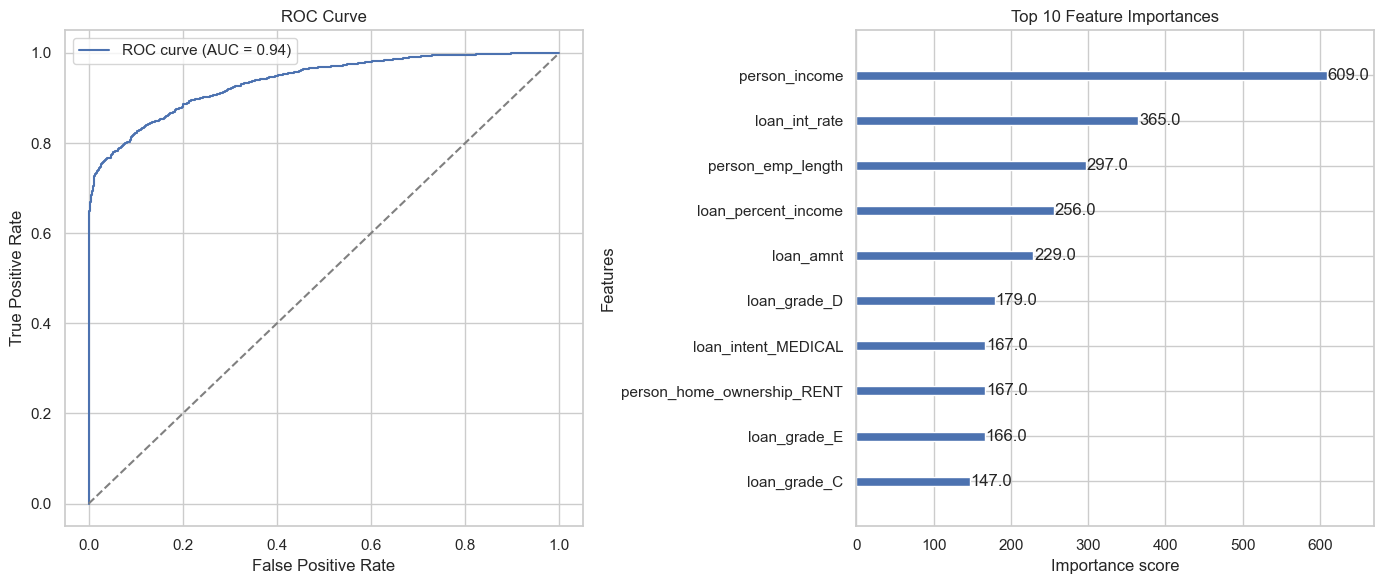

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from xgboost import plot_importance

# --- Compute ROC Curve values ---
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# --- Plot ROC and Feature Importance side by side ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- ROC Curve ---
axes[0].plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend()
axes[0].grid(True)

# --- Feature Importance (Top 10) ---
plot_importance(best_model, max_num_features=10, ax=axes[1])
axes[1].set_title("Top 10 Feature Importances")

plt.tight_layout()
plt.show()

In [23]:
# Check for potential data leakage
print("Correlation between features and target:")
feature_target_corr = feature_target_corr = df.select_dtypes(include=['number']).corr()['loan_status'].abs().sort_values(ascending=False)
print(feature_target_corr.head(10))

# Cross-validation to check for overfitting
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f"Cross-validation AUC: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


Correlation between features and target:
loan_status                   1.000000
loan_percent_income           0.379823
loan_int_rate                 0.323210
person_income                 0.164128
loan_amnt                     0.112188
person_emp_length             0.085966
person_age                    0.022130
cb_person_cred_hist_length    0.016830
Name: loan_status, dtype: float64
Cross-validation AUC: 0.922 (+/- 0.034)


## 8. Business Impact Analysis

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_cleaned = df.copy()

# Label encode all object and categorical columns
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object' or str(df_cleaned[col].dtype).startswith('category'):
        df_cleaned[col] = df_cleaned[col].astype(str)  # Make sure it's string
        df_cleaned[col] = LabelEncoder().fit_transform(df_cleaned[col])
        

df_cleaned['is_homeowner'] = df_cleaned['is_homeowner'].astype(int)
print(df_cleaned.dtypes)
print(df_cleaned.select_dtypes(exclude=['int64', 'float64']).columns)

person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
is_homeowner                    int64
dtype: object
Index([], dtype='object')


In [25]:
def calculate_risk_score(probability, scale=1000):
    """
    Convert probability to industry-standard risk score (300-850 range).
    Lower probability of default = higher score.
    """
    risk_score = 300 + (1 - probability) * 550
    return min(max(risk_score, 300), 850)

In [26]:
def loan_approval_recommendation(risk_score, loan_amount, income):
    """
    Simulates a rule-based loan approval decision based on:
    - Risk score (300–850)
    - Debt-to-income ratio

    Returns: 'APPROVE', 'REVIEW', or 'DECLINE'
    """
    if risk_score >= 700 and loan_amount/income <= 0.4:
        return "APPROVE"
    elif risk_score >= 600 and loan_amount/income <= 0.3:
        return "REVIEW" 
    else:
        return "DECLINE"

In [27]:
def calculate_business_impact(y_true, y_pred, avg_loan_amount=15000):
    tp = ((y_true == 1) & (y_pred == 1)).sum()  # True Positives
    fn = ((y_true == 1) & (y_pred == 0)).sum()  # False Negatives

    loss_prevented = tp * avg_loan_amount
    potential_loss = (tp + fn) * avg_loan_amount

    return {
        'Defaults Caught (TP)': tp,
        'Defaults Missed (FN)': fn,
        'Catch Rate': round(tp / (tp + fn + 1e-6), 3),  # avoid division by 0
        'Loss Prevented': f"${loss_prevented:,.0f}",
        'Total Default Risk': f"${potential_loss:,.0f}",
        'Impact': f"{round(100 * loss_prevented / potential_loss, 2)}% prevented"
    }

## 10. Risk scoring & Approval Framework

## Risk Score Mapping and Loan Decision Framework

We translate model probabilities into a 300–850 credit score scale, similar to FICO.  
Business logic then maps risk score and income to approval decisions.

In [28]:
def loan_approval_recommendation(risk_score, loan_amount, income):
    """
    Simulate a bank's loan approval decision using risk score and DTI ratio.
    """
    dti_ratio = loan_amount / income
    if risk_score >= 700 and dti_ratio <= 0.4:
        return "APPROVE"
    elif risk_score >= 600 and dti_ratio <= 0.3:
        return "REVIEW"
    else:
        return "DECLINE"

In [29]:
# pdo: points to double the odds (commonly 50)
# base_odds: odds of a 'good' outcome at baseline score (typically 1/9)
# formula aligns with FICO-style credit score logic

def calculate_risk_score(probability, base_score=650, base_odds=1/9, pdo=50):
    """
    Convert default probability to a credit score between 300 and 850.
    
    Parameters:
    - probability: predicted probability of default (must be between 0 and 1)
    - base_score: the score at the base odds (default: 650)
    - base_odds: the odds (non-default/default) corresponding to base_score (default: 9:1)
    - pdo: points to double the odds (default: 50, common in credit scoring)
    
    Returns:
    - Integer credit score (clipped to 300–850 range)
    """
    # Clip extreme values to avoid math errors
    probability = np.clip(probability, 0.001, 0.999)
    odds = (1 - probability) / probability
    
    factor = pdo / np.log(2)
    offset = base_score - factor * np.log(base_odds)
    
    score = offset + factor * np.log(odds)
    return int(np.clip(score, 300, 850))

def get_risk_tier(score):
    if score >= 720:
        return "Super Prime"  # More precise industry term
    elif score >= 680:
        return "Prime"
    elif score >= 620:
        return "Near Prime"
    elif score >= 580:
        return "Subprime"
    else:
        return "Deep Subprime"


## Simulated 5Cs of Credit Assessment

This function simulates a manual underwriting assessment based on the classic 5Cs:
Character, Capacity, Capital, Collateral, and Conditions.

Weights:  
- Character: 35% (based on past default)  
- Capacity: 30% (debt ratio)  
- Capital: 15% (employment stability)  
- Collateral: 10% (homeownership)  
- Conditions: 10% (loan intent)

In [30]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'is_homeowner'],
      dtype='object')

In [31]:
def assess_5cs_of_credit(row):
    """5 Cs of Credit: Character, Capacity, Capital, Collateral, Conditions"""
    
    # Character (35%) - Credit history reliability
    # Use the encoded column: cb_person_default_on_file_Y
    # 1 means 'Y' (has default), 0 means 'N' (no default)
    has_default = row.get('cb_person_default_on_file_Y', 0)
    character_score = 30 if has_default == 1 else 100
    
    # Rest of function remains the same...
    capacity_score = max(0, 100 - (row['loan_percent_income'] * 150))
    capital_score = min(100, row['person_emp_length'] * 8)
    
    # Update other categorical columns similarly
    is_owner = row.get('person_home_ownership_OWN', 0)
    collateral_score = 100 if is_owner == 1 else 50
    
    education_loan = row.get('loan_intent_EDUCATION', 0)
    medical_loan = row.get('loan_intent_MEDICAL', 0)
    conditions_score = 80 if (education_loan == 1 or medical_loan == 1) else 60
    
    total_score = (character_score * 0.35 + 
                   capacity_score * 0.30 + 
                   capital_score * 0.15 + 
                   collateral_score * 0.10 + 
                   conditions_score * 0.10)
    
    return min(100, max(0, total_score))


In [32]:
import numpy as np

# Align test set
X_test_aligned = X_test[X_train.columns]

# Sample 10 random applicants
sample_idx = np.random.choice(X_test_aligned.index, size=10, replace=False)

# Predict probabilities
probs = best_model.predict_proba(X_test_aligned.loc[sample_idx])[:, 1]

print("Sample Applicant Scoring (Model + Rule-Based Logic)\n")
for i, idx in enumerate(sample_idx):
    row = X_test_aligned.loc[idx]
    prob = probs[i]
    score = calculate_risk_score(prob)
    credit_score = assess_5cs_of_credit(row)  # Now works with encoded data
    loan_amt = row['loan_amnt']
    income = row['person_income']
    decision = loan_approval_recommendation(score, loan_amt, income)
    
    print(f"Applicant {i+1}: RiskScore={score}, Credit5Cs={credit_score:.1f}, Loan=${loan_amt:,.0f}, Income=${income:,.0f}, Decision={decision}")


Sample Applicant Scoring (Model + Rule-Based Logic)

Applicant 1: RiskScore=850, Credit5Cs=74.8, Loan=$6,000, Income=$38,400, Decision=APPROVE
Applicant 2: RiskScore=669, Credit5Cs=51.2, Loan=$5,000, Income=$91,800, Decision=REVIEW
Applicant 3: RiskScore=850, Credit5Cs=88.3, Loan=$6,000, Income=$96,000, Decision=APPROVE
Applicant 4: RiskScore=850, Credit5Cs=87.6, Loan=$6,500, Income=$53,000, Decision=APPROVE
Applicant 5: RiskScore=850, Credit5Cs=78.0, Loan=$8,000, Income=$40,000, Decision=APPROVE
Applicant 6: RiskScore=611, Credit5Cs=48.3, Loan=$3,200, Income=$48,000, Decision=REVIEW
Applicant 7: RiskScore=431, Credit5Cs=63.1, Loan=$4,500, Income=$10,000, Decision=DECLINE
Applicant 8: RiskScore=797, Credit5Cs=73.9, Loan=$25,000, Income=$97,000, Decision=APPROVE
Applicant 9: RiskScore=850, Credit5Cs=71.9, Loan=$13,600, Income=$78,625, Decision=APPROVE
Applicant 10: RiskScore=850, Credit5Cs=78.4, Loan=$14,500, Income=$90,000, Decision=APPROVE


In [33]:
#  Business Impact 
print("\n Business Impact Summary")
impact = calculate_business_impact(y_test, y_pred)

for k, v in impact.items():
    print(f"{k}: {v}")


 Business Impact Summary
Defaults Caught (TP): 1010
Defaults Missed (FN): 355
Catch Rate: 0.74
Loss Prevented: $15,150,000
Total Default Risk: $20,475,000
Impact: 73.99% prevented


In [34]:
# Align test features with training columns
X_test_aligned = X_test[X_train.columns]

# Predict probabilities
probs = best_model.predict_proba(X_test_aligned)[:, 1]
loan_amnts = X_test_aligned['loan_amnt']
incomes = X_test_aligned['person_income']

# Store results
decisions = []
scores = []

for i in range(len(X_test_aligned)):
    prob = probs[i]
    score = calculate_risk_score(prob)
    decision = loan_approval_recommendation(score, loan_amnts.iloc[i], incomes.iloc[i])
    
    scores.append(score)
    decisions.append(decision)

# Count each decision type
from collections import Counter

decision_counts = Counter(decisions)
total = len(decisions)

print("Loan Approval Summary:")
for decision in ['APPROVE', 'REVIEW', 'DECLINE']:
    count = decision_counts.get(decision, 0)
    percentage = (count / total) * 100
    print(f"{decision}: {count} applicants ({percentage:.1f}%)")

# (Optional) Combine into a DataFrame if you want to export
decision_df = X_test_aligned.copy()
decision_df['probability'] = probs
decision_df['risk_score'] = scores
decision_df['decision'] = decisions

Loan Approval Summary:
APPROVE: 5386 applicants (85.0%)
REVIEW: 226 applicants (3.6%)
DECLINE: 724 applicants (11.4%)


## 9. Model Interpretation

## Model Interpretability with SHAP

SHAP values help identify which features drive risk predictions, supporting explainability.  
In banking, this is critical for regulatory compliance (e.g., ECOA, SR 11-7).

/Users/seokhyunyoon/.virtualenvs/r-reticulate/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Diagnostic Information:
Model type: <class 'xgboost.sklearn.XGBClassifier'>
Sample shape: (500, 23)
Model fitted: True


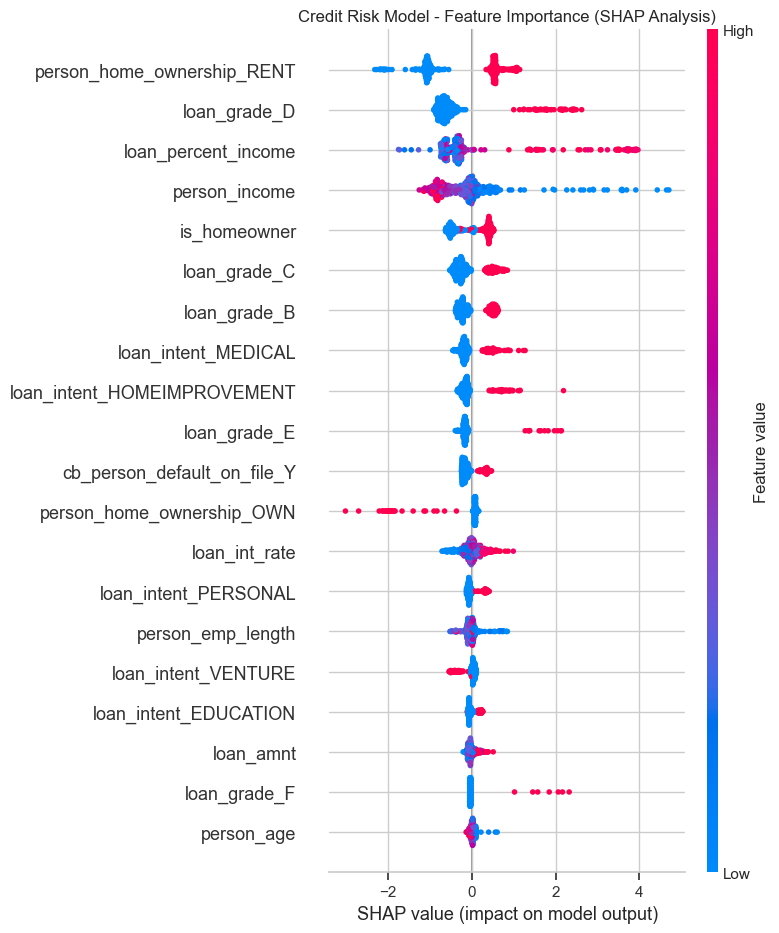

In [35]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Use the correct model and aligned data
# Use best_model (from your RandomizedSearchCV) and X_test_aligned
X_sample = X_test_aligned.sample(n=500, random_state=42)

print("Diagnostic Information:")
print(f"Model type: {type(best_model)}")
print(f"Sample shape: {X_sample.shape}")
print(f"Model fitted: {hasattr(best_model, 'feature_importances_')}")

# STEP 2: Create SHAP explainer specifically for tree-based models
 # Use TreeExplainer specifically for XGBoost models
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_sample)
    
# STEP 3: Handle binary classification SHAP values
# For binary classification, shap_values might be a list
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Use positive class (default=1)
    
# STEP 4: Create summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_sample, show=False)
plt.title("Credit Risk Model - Feature Importance (SHAP Analysis)")
plt.tight_layout()
plt.show()


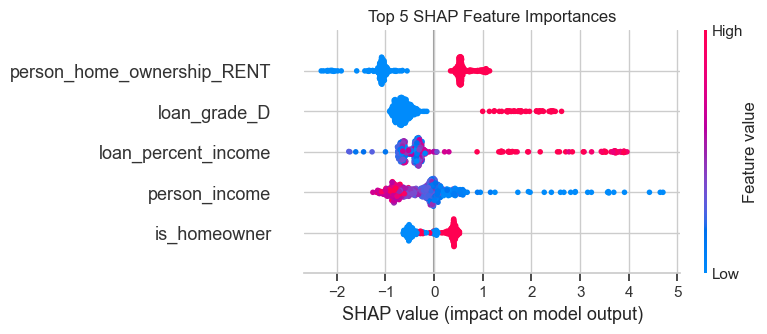

In [36]:
# Extracts the top 5 highest-mean SHAP impact feature

# Step 1: Get mean absolute SHAP values for top 5 features
shap_df = pd.DataFrame({
    'feature': X_sample.columns,
    'mean_abs_shap': np.abs(shap_values).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)

top_5_features = shap_df['feature'].head(5).tolist()

# Step 2: Filter SHAP values and features to top 5
X_sample_top5 = X_sample[top_5_features]
shap_values_top5 = shap_values[:, [X_sample.columns.get_loc(f) for f in top_5_features]]

# Step 3: Plot SHAP summary plot for top 5
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values_top5, X_sample_top5, show=False)
plt.title("Top 5 SHAP Feature Importances")
plt.tight_layout()
plt.show()

In [37]:
import pandas as pd
import numpy as np

# Create feature importance ranking
shap_df = pd.DataFrame({
    'feature': X_sample.columns,
    'mean_abs_shap': np.abs(shap_values).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)

print("Top 10 Risk Factors (SHAP Analysis)")
print("=" * 50)
print(shap_df.head(10))

# Enhanced banking interpretation
print("\nBanking Risk Factor Interpretation:")
print("=" * 50)

for i, row in shap_df.head(5).iterrows():
    feature_name = row['feature']
    importance = row['mean_abs_shap']
    
    # Add banking context
    if 'income' in feature_name.lower():
        context = "💰 Borrower's repayment capacity"
    elif 'default' in feature_name.lower():
        context = "📊 Credit history reliability"
    elif 'home' in feature_name.lower():
        context = "🏠 Collateral/asset backing"
    elif 'emp' in feature_name.lower():
        context = "💼 Employment stability"
    elif 'loan_percent' in feature_name.lower():
        context = "⚖️ Debt-to-income ratio"
    elif 'age' in feature_name.lower():
        context = "👤 Borrower demographics"
    else:
        context = "📈 General risk indicator"
    
    print(f"{i+1}. {feature_name}: {importance:.3f}")
    print(f"   → {context}")
    print()


Top 10 Risk Factors (SHAP Analysis)
                        feature  mean_abs_shap
10   person_home_ownership_RENT       0.870003
18                 loan_grade_D       0.747716
5           loan_percent_income       0.736528
1                 person_income       0.526310
7                  is_homeowner       0.404926
17                 loan_grade_C       0.335221
16                 loan_grade_B       0.324472
13          loan_intent_MEDICAL       0.251896
12  loan_intent_HOMEIMPROVEMENT       0.234940
19                 loan_grade_E       0.207981

Banking Risk Factor Interpretation:
11. person_home_ownership_RENT: 0.870
   → 🏠 Collateral/asset backing

19. loan_grade_D: 0.748
   → 📈 General risk indicator

6. loan_percent_income: 0.737
   → 💰 Borrower's repayment capacity

2. person_income: 0.526
   → 💰 Borrower's repayment capacity

8. is_homeowner: 0.405
   → 🏠 Collateral/asset backing



## Portfolio Insights & Visualization

The charts below show how decisions vary by debt ratio, income, homeownership, and predicted risk score.


/var/folders/km/dh90y6_54t9_vpxl93qn2_dc0000gn/T/ipykernel_1388/332325330.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age = decision_df.groupby(['age_bin', 'decision']).size().unstack(fill_value=0)
/var/folders/km/dh90y6_54t9_vpxl93qn2_dc0000gn/T/ipykernel_1388/332325330.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_income = decision_df.groupby(['income_bin', 'decision']).size().unstack(fill_value=0)


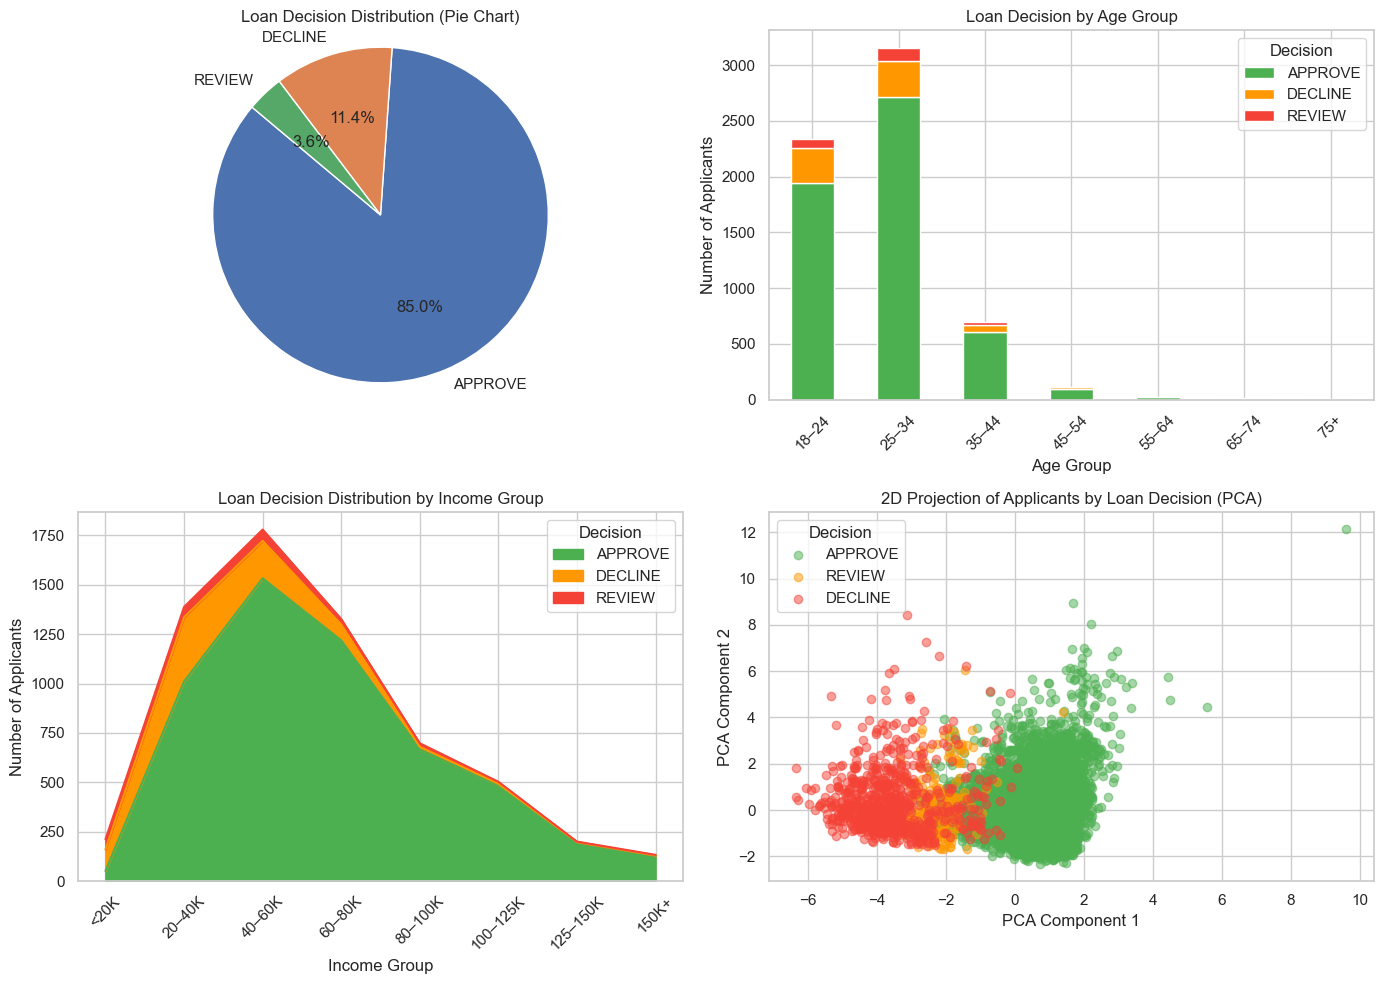

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- Setup subplots ---
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.set(style="whitegrid")

# --- 1. Pie Chart: Overall Loan Decision Distribution ---
decision_counts = decision_df['decision'].value_counts()
axs[0, 0].pie(
    decision_counts.values,
    labels=decision_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(edgecolor='w')
)
axs[0, 0].set_title('Loan Decision Distribution (Pie Chart)')
axs[0, 0].axis('equal')

# --- 2. Stacked Bar Chart: Age Group vs. Loan Decisions ---
age_bins = [18, 25, 35, 45, 55, 65, 75, 85]  
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75+']
decision_df['age_bin'] = pd.cut(decision_df['person_age'], bins=age_bins, labels=age_labels, right=False)

grouped_age = decision_df.groupby(['age_bin', 'decision']).size().unstack(fill_value=0)
grouped_age.plot(
    kind='bar',
    stacked=True,
    ax=axs[0, 1],
    color=['#4caf50', '#ff9800', '#f44336']
)
axs[0, 1].set_title('Loan Decision by Age Group')
axs[0, 1].set_xlabel('Age Group')
axs[0, 1].set_ylabel('Number of Applicants')
axs[0, 1].legend(title='Decision')
axs[0, 1].tick_params(axis='x', rotation=45)

# --- 3. Stacked Area Chart: Income Group vs. Loan Decisions ---
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 125000, 150000, 200000]
income_labels = ['<20K', '20–40K', '40–60K', '60–80K', '80–100K', '100–125K', '125–150K', '150K+']
decision_df['income_bin'] = pd.cut(decision_df['person_income'], bins=income_bins, labels=income_labels, right=False)

grouped_income = decision_df.groupby(['income_bin', 'decision']).size().unstack(fill_value=0)
grouped_income = grouped_income.loc[income_labels]  # ensure bin order

grouped_income.plot(
    kind='area',
    stacked=True,
    ax=axs[1, 0],
    color=['#4caf50', '#ff9800', '#f44336']
)
axs[1, 0].set_title('Loan Decision Distribution by Income Group')
axs[1, 0].set_xlabel('Income Group')
axs[1, 0].set_ylabel('Number of Applicants')
axs[1, 0].legend(title='Decision')
axs[1, 0].tick_params(axis='x', rotation=45)

# --- 4. PCA Scatter Plot ---
df_encoded = decision_df.select_dtypes(include=['number']).drop('loan_status', axis=1, errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
decision_df['PC1'] = components[:, 0]
decision_df['PC2'] = components[:, 1]

for decision, color in zip(['APPROVE', 'REVIEW', 'DECLINE'], ['#4caf50', '#ff9800', '#f44336']):
    subset = decision_df[decision_df['decision'] == decision]
    axs[1, 1].scatter(subset['PC1'], subset['PC2'], label=decision, alpha=0.5, color=color)

axs[1, 1].set_title("2D Projection of Applicants by Loan Decision (PCA)")
axs[1, 1].set_xlabel("PCA Component 1")
axs[1, 1].set_ylabel("PCA Component 2")
axs[1, 1].legend(title='Decision')

# --- Layout ---
plt.tight_layout()
plt.show()

/var/folders/km/dh90y6_54t9_vpxl93qn2_dc0000gn/T/ipykernel_1388/1373570364.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_grouped = decision_df.groupby(['dti_bin', 'decision']).size().unstack(fill_value=0)
/var/folders/km/dh90y6_54t9_vpxl93qn2_dc0000gn/T/ipykernel_1388/1373570364.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate = decision_df.groupby('score_bin')['loan_status'].mean()


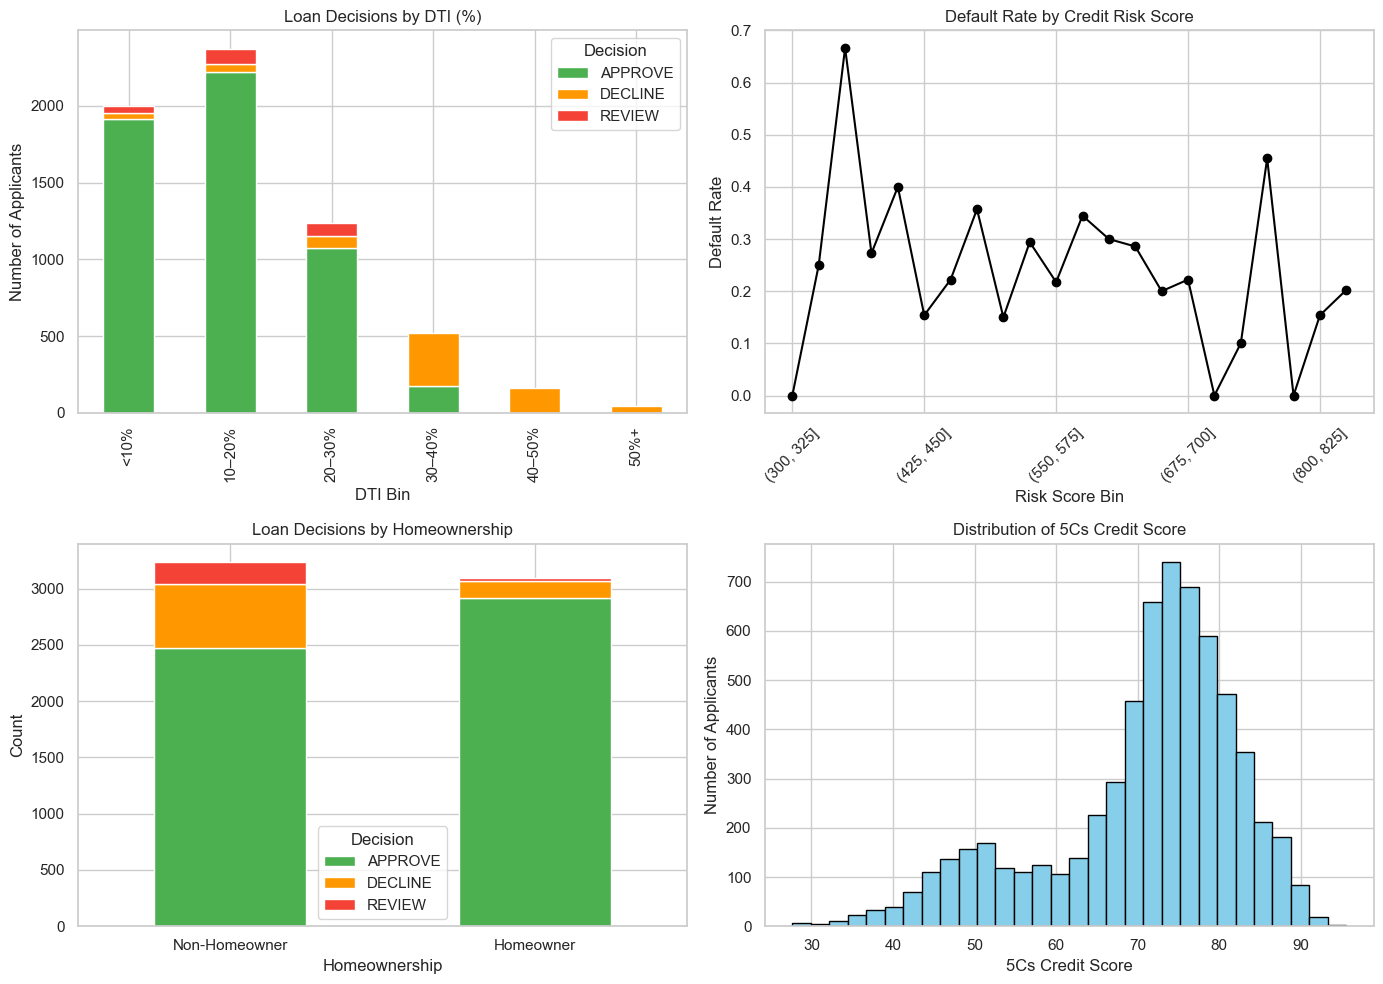

In [39]:
# Add loan_status back if it's missing
if 'loan_status' not in decision_df.columns:
    decision_df['loan_status'] = y_test.reset_index(drop=True)

# Calculate risk scores if not already present
if 'risk_score' not in decision_df.columns:
    xgb_model = models['XGBoost']  # or replace with your model variable
    decision_df['risk_score'] = xgb_model.predict_proba(X_test_aligned)[:, 1]
    decision_df['risk_score'] = decision_df['score'].apply(calculate_risk_score)
    
# Set plot style
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Stacked bar chart by DTI bins
dti_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
dti_labels = ['<10%', '10–20%', '20–30%', '30–40%', '40–50%', '50%+']
decision_df['dti_bin'] = pd.cut(decision_df['loan_percent_income'], bins=dti_bins, labels=dti_labels)
dti_grouped = decision_df.groupby(['dti_bin', 'decision']).size().unstack(fill_value=0)

dti_grouped.plot(
    kind='bar',
    stacked=True,
    ax=axs[0, 0],
    color=['#4caf50', '#ff9800', '#f44336']
)
axs[0, 0].set_title('Loan Decisions by DTI (%)')
axs[0, 0].set_ylabel('Number of Applicants')
axs[0, 0].set_xlabel('DTI Bin')
axs[0, 0].legend(title='Decision')

# 2. Line chart: Default rate by risk score
decision_df['score_bin'] = pd.cut(decision_df['risk_score'], bins=np.arange(300, 851, 25))
default_rate = decision_df.groupby('score_bin')['loan_status'].mean()

default_rate.plot(ax=axs[0, 1], marker='o', color='black')
axs[0, 1].set_title('Default Rate by Credit Risk Score')
axs[0, 1].set_ylabel('Default Rate')
axs[0, 1].set_xlabel('Risk Score Bin')
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Homeownership vs. Loan Decisions
home_own_group = decision_df.groupby(['is_homeowner', 'decision']).size().unstack(fill_value=0)
home_own_group.plot(kind='bar', stacked=True, ax=axs[1, 0], color=['#4caf50', '#ff9800', '#f44336'])
axs[1, 0].set_title('Loan Decisions by Homeownership')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_xticklabels(['Non-Homeowner', 'Homeowner'], rotation=0)
axs[1, 0].set_xlabel('Homeownership')
axs[1, 0].legend(title='Decision')

# 5cs Histogram
decision_df['credit_score_5cs'] = decision_df.apply(assess_5cs_of_credit, axis=1)

# --- 1. Histogram of 5Cs Credit Score

axs[1,1].hist(decision_df['credit_score_5cs'], bins=30, color='skyblue', edgecolor='black')
axs[1,1].set_xlabel('5Cs Credit Score')
axs[1,1].set_ylabel('Number of Applicants')
axs[1,1].set_title('Distribution of 5Cs Credit Score')




plt.tight_layout()
plt.show()

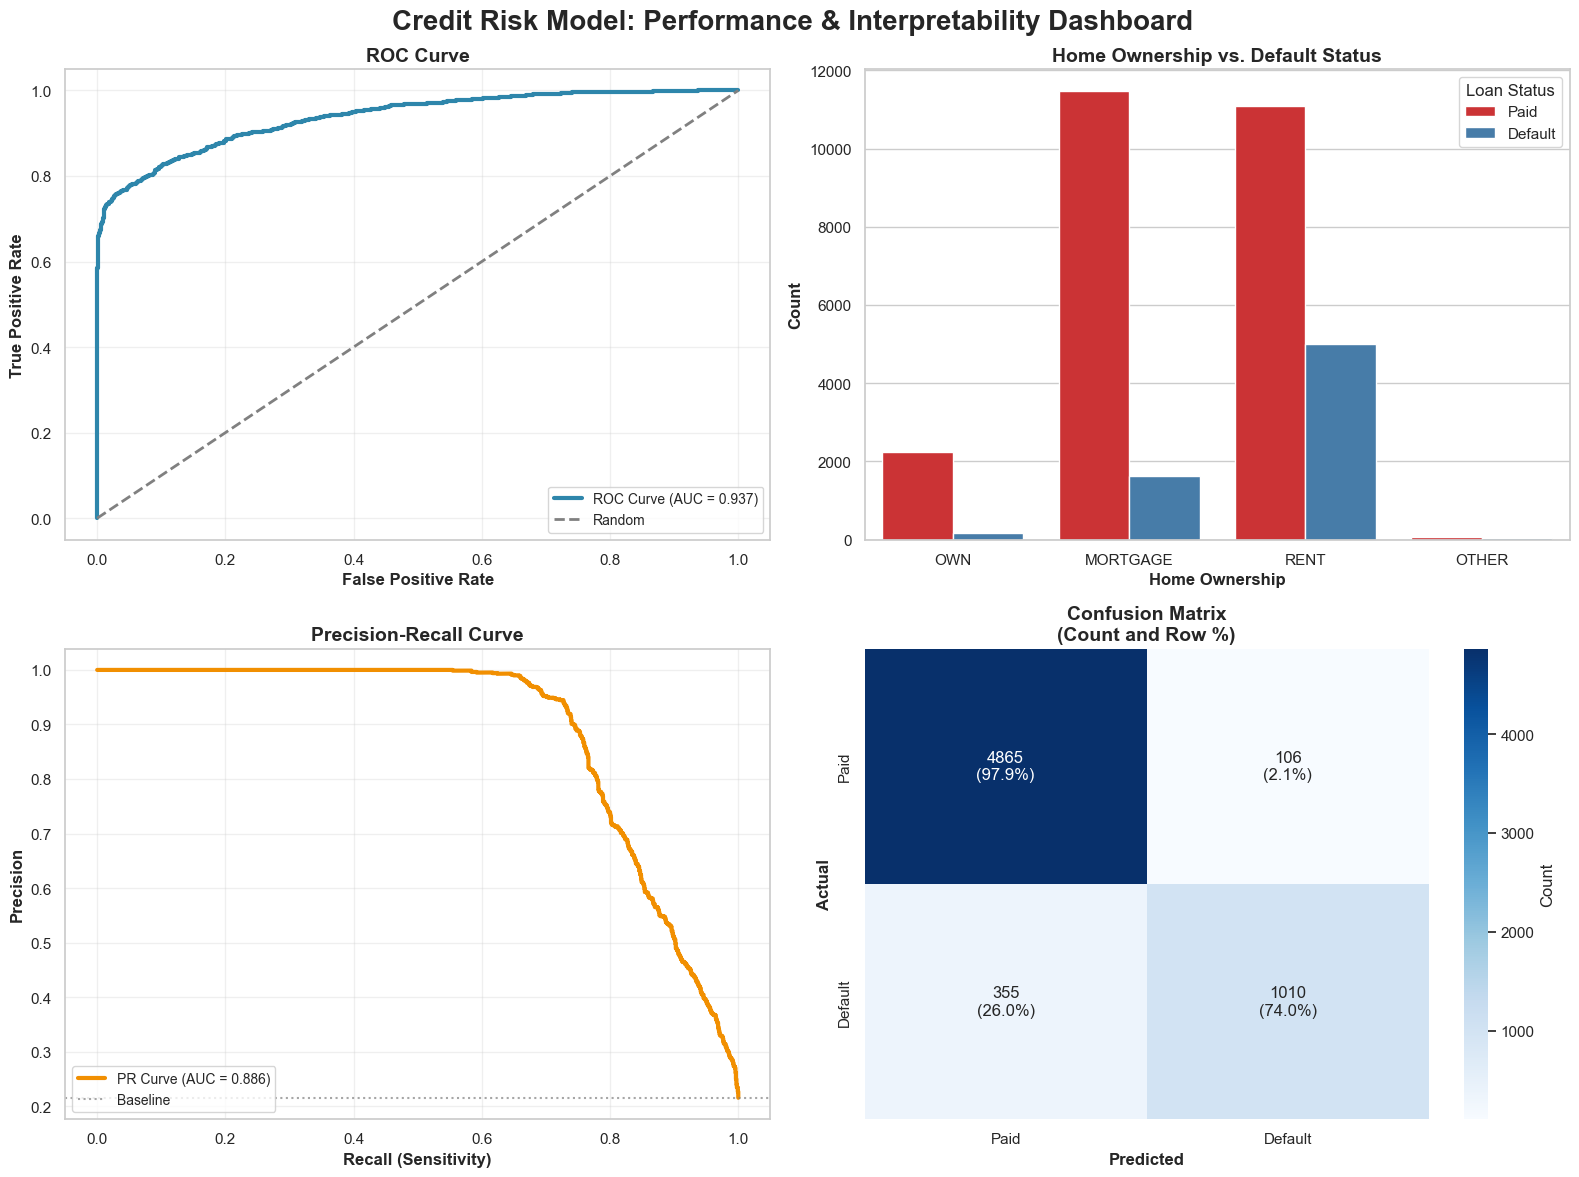

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

# --- Assume y_test, y_prob, y_pred, and best_model are already defined ---

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Credit Risk Model: Performance & Interpretability Dashboard', fontsize=20, fontweight='bold', y=0.98)

# [0,0] ROC Curve
ax1 = axes[0, 0]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='#2E86AB', linewidth=3, label=f'ROC Curve (AUC = {roc_auc:.3f})')
ax1.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2, label='Random')
ax1.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax1.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax1.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax1.legend(loc="lower right", fontsize=10)
ax1.grid(True, alpha=0.3)

# [0,1] SHAP Feature Importance (add separately as a standalone plot)
# [0,1] Feature Distribution: person_home_ownership by default status
ax2 = axes[0, 1]
sns.countplot(x='person_home_ownership', hue='loan_status', data=df, ax=ax2, palette='Set1')
ax2.set_xlabel('Home Ownership', fontsize=12, fontweight='bold')
ax2.set_ylabel('Count', fontsize=12, fontweight='bold')
ax2.set_title('Home Ownership vs. Default Status', fontsize=14, fontweight='bold')
ax2.legend(title='Loan Status', labels=['Paid', 'Default'])

# [1,0] Precision-Recall Curve
ax3 = axes[1, 0]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
ax3.plot(recall, precision, color='#F18F01', linewidth=3, label=f'PR Curve (AUC = {pr_auc:.3f})')
ax3.axhline(y=np.mean(y_test), color='gray', linestyle=':', alpha=0.7, label='Baseline')
ax3.set_xlabel('Recall (Sensitivity)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax3.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
ax3.legend(loc="lower left", fontsize=10)
ax3.grid(True, alpha=0.3)

# [1,1] Confusion Matrix with Rates
ax4 = axes[1, 1]
cm = confusion_matrix(y_test, y_pred)
cm_sum = cm.sum(axis=1, keepdims=True)
cm_perc = np.round(cm / cm_sum * 100, 1)
labels = np.asarray([f"{cm[i, j]}\n({cm_perc[i, j]}%)"
                     for i in range(cm.shape[0]) for j in range(cm.shape[1])]).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax=ax4,
            xticklabels=['Paid', 'Default'], yticklabels=['Paid', 'Default'],
            cbar_kws={'label': 'Count'})
ax4.set_xlabel('Predicted', fontsize=12, fontweight='bold')
ax4.set_ylabel('Actual', fontsize=12, fontweight='bold')
ax4.set_title('Confusion Matrix\n(Count and Row %)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.savefig('images/performance_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


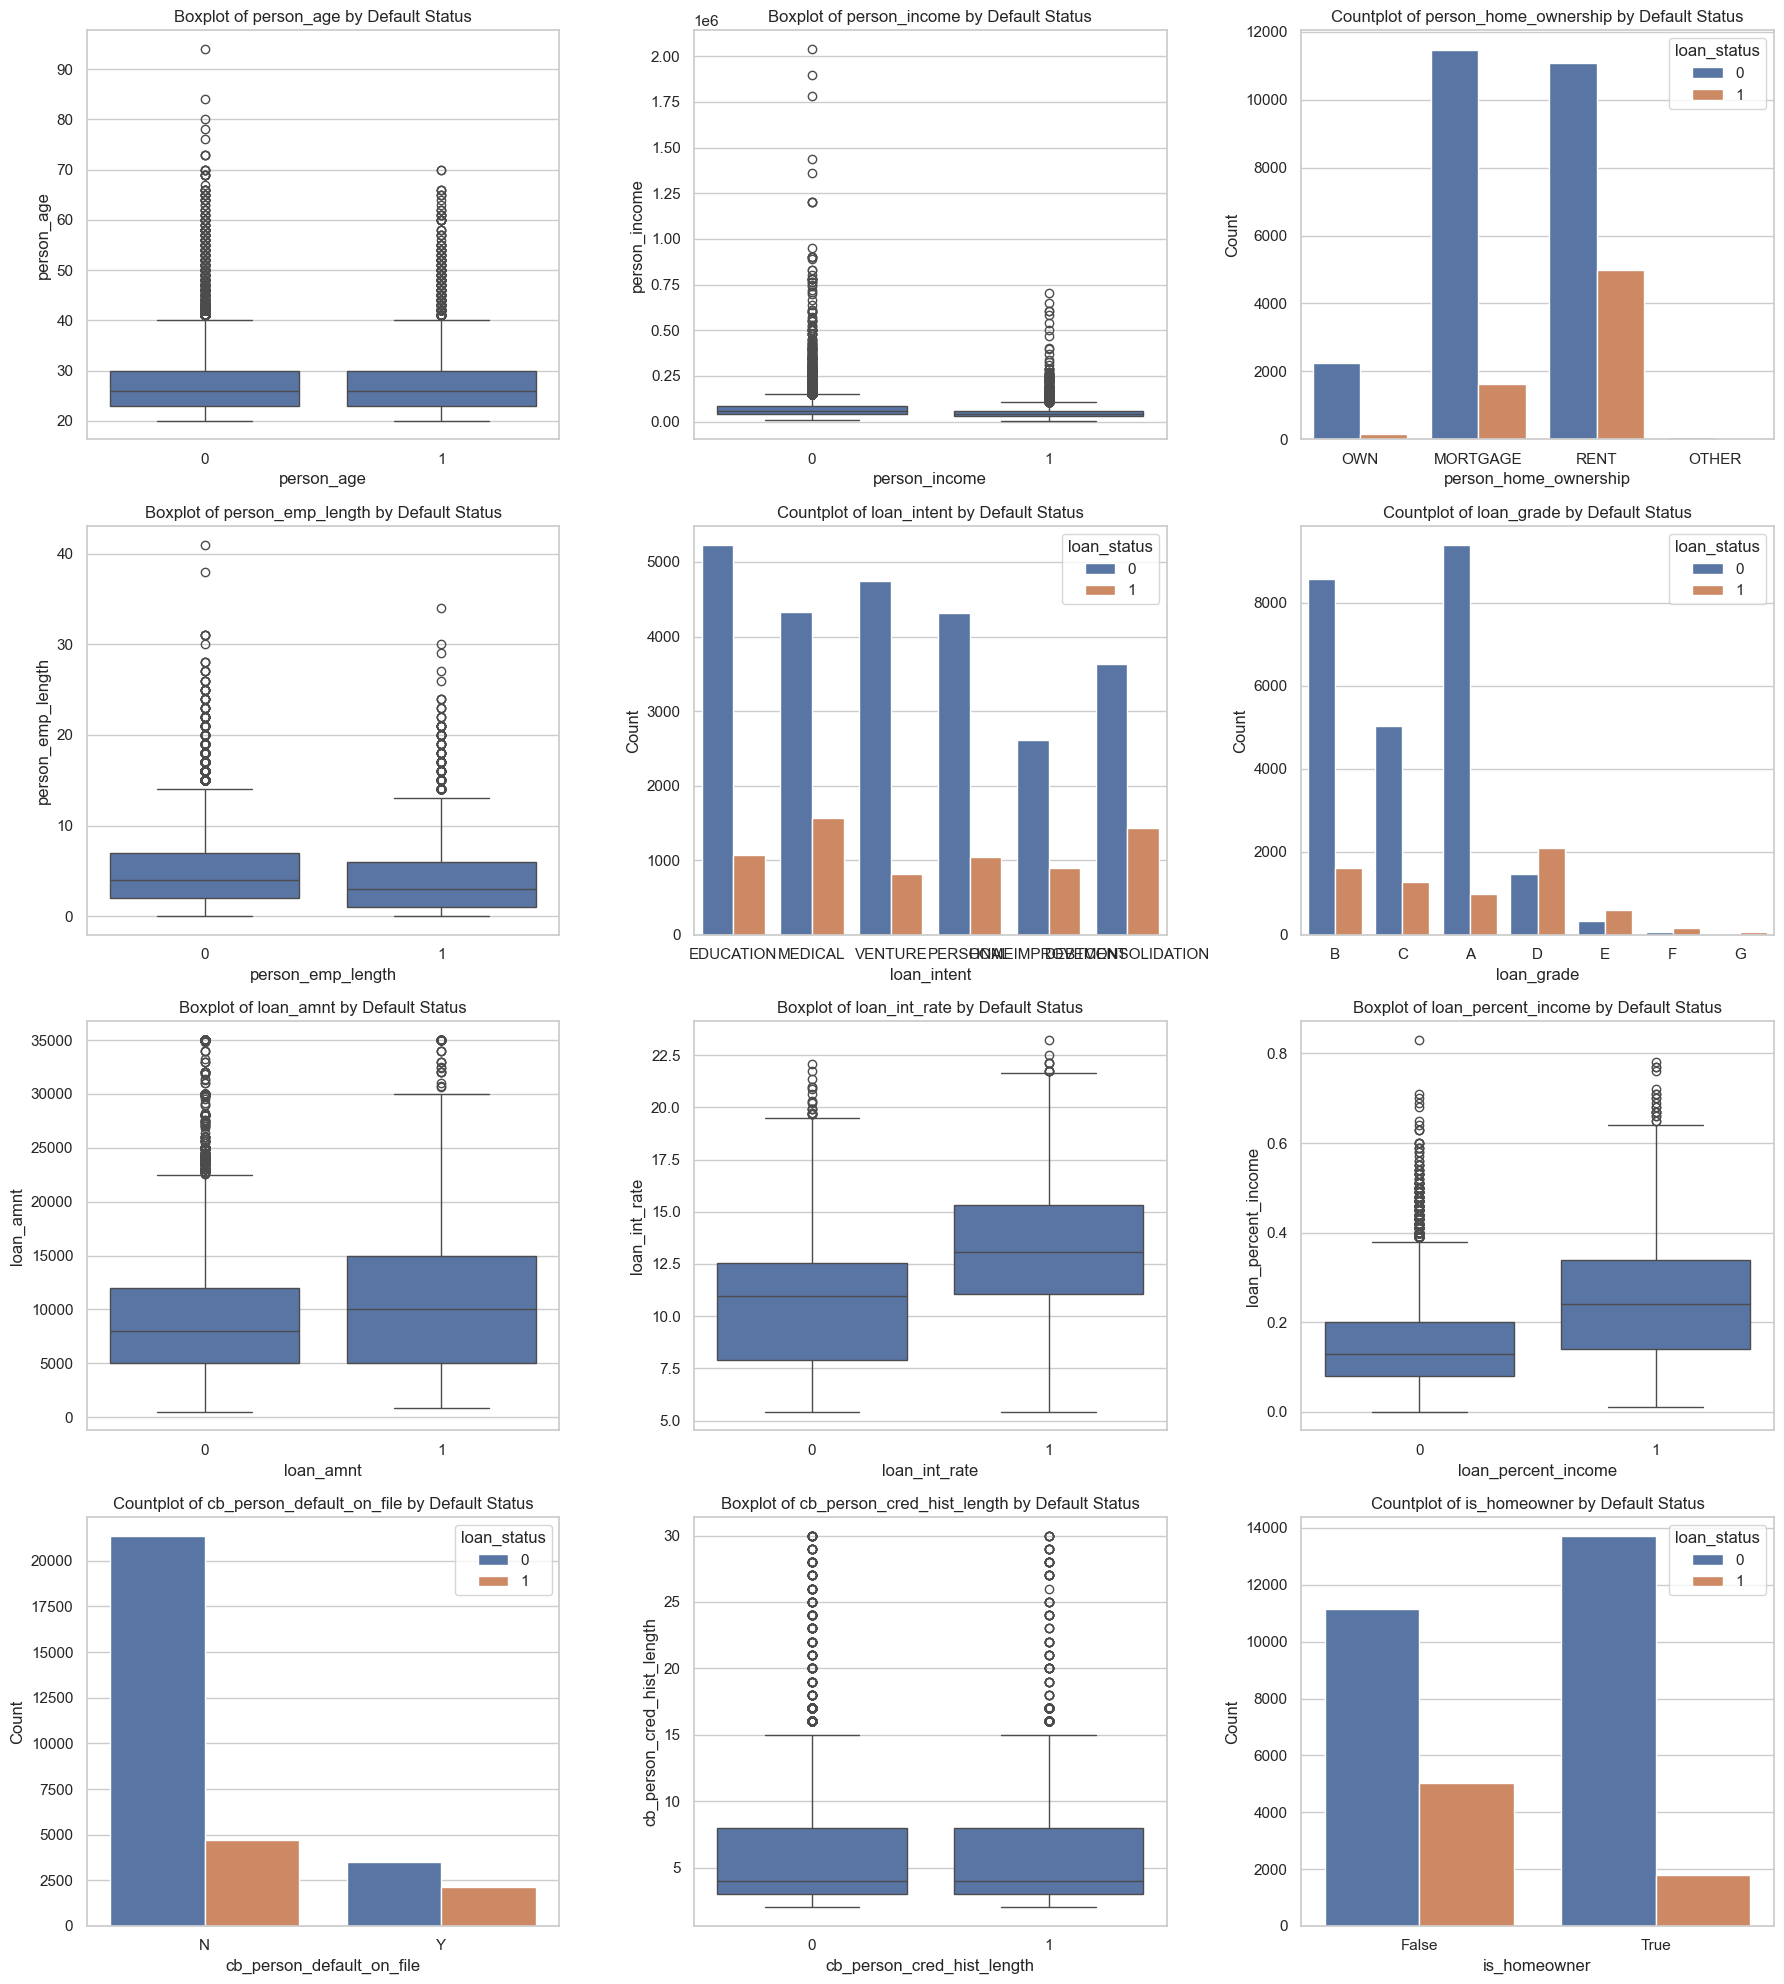

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your original DataFrame with all columns loaded
sns.set(style='whitegrid')

# Exclude the target from features to plot
columns_to_plot = [col for col in df.columns if col != 'loan_status']

# Grid size (adjust num_cols for your preference)
num_cols = 3
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    if df[col].dtype in ['int64', 'float64']:
        # Numeric: boxplot
        sns.boxplot(x='loan_status', y=col, data=df, ax=ax)
        ax.set_title(f'Boxplot of {col} by Default Status')
        ax.set_ylabel(col)
    else:
        # Categorical: countplot
        sns.countplot(x=col, hue='loan_status', data=df, ax=ax)
        ax.set_title(f'Countplot of {col} by Default Status')
        ax.set_ylabel('Count')
    ax.set_xlabel(col)

# Remove unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
